In [2]:
sum([True, False, True])

2

In [3]:
import numpy as np

tosses = np.array(['Tails', 'Head', 'Tails', 'Heads', 'Heads'])
tosses == 'Tails'

array([ True, False,  True, False, False])

In [4]:
np.count_nonzero(tosses == 'Tails')

2

In [5]:
sum(tosses == 'Tails')

2

In [6]:
two_groups = np.array(['treatment', 'control'])
sum(np.random.choice(two_groups, size=5, replace=True, p=[.6, .4]) == 'control')


1

In [7]:
def one_bet(x):
    """returns my net gain if the die shows  spots"""
    if x <= 2:
        return -1  # return이 여기서 되지 않는다면 swtich문처럼 계속 내려갈 수도 있다.
    elif x <= 4:
        return 0
    elif x <= 6:
        return 1

In [8]:
def bet_on_one_roll():
    """returns my net gain if the die shows  spots"""
    x = np.random.choice(np.arange(1, 7))
    if x <= 2:
        return -1  # return이 여기서 되지 않는다면 swtich문처럼 계속 내려갈 수도 있다.
    elif x <= 4:
        return 0
    elif x <= 6:
        return 1

In [9]:
outcomes = np.array([])

for i in range(300):
    outcomes = np.append(outcomes, bet_on_one_roll())

sum(outcomes)

11.0

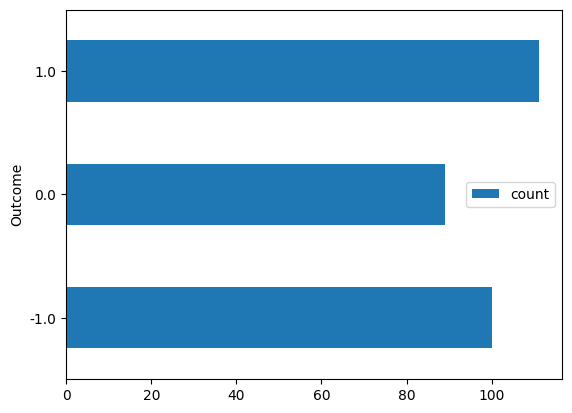

In [10]:
import pandas as pd

outcome_table = pd.DataFrame({'Outcome': outcomes})
outcome_table = outcome_table.groupby('Outcome')['Outcome'].count()
outcome_table = outcome_table.reset_index(name='count')
fig = outcome_table.plot.barh(x='Outcome', y='count')

In [11]:
coin = np.array(['Heads', 'Tails'])
np.random.choice(coin, 10)


array(['Heads', 'Heads', 'Tails', 'Tails', 'Heads', 'Heads', 'Heads',
       'Tails', 'Heads', 'Heads'], dtype='<U5')

In [12]:
outcomes = np.random.choice(coin, 100)
num_heads= np.count_nonzero(outcomes == 'Heads')
num_heads
def one_simulated_value():
    outcomes = np.random.choice(coin, 100)
    return np.count_nonzero(outcomes == 'Heads')


In [13]:
num_repetitions= 20000# number of repetitions
# repeat the process num_repetitionstimes
for i in np.arange(num_repetitions):
    # simulate one value using the function defined
    new_value= one_simulated_value()


In [14]:
num_repetitions= 20000# number of repetitions
heads = np.array([])
# repeat the process num_repetitionstimes
for i in np.arange(num_repetitions):
# simulate one value using the function defined
    new_value= one_simulated_value()# augment the collection array with the simulated value
    heads = np.append(heads, new_value)

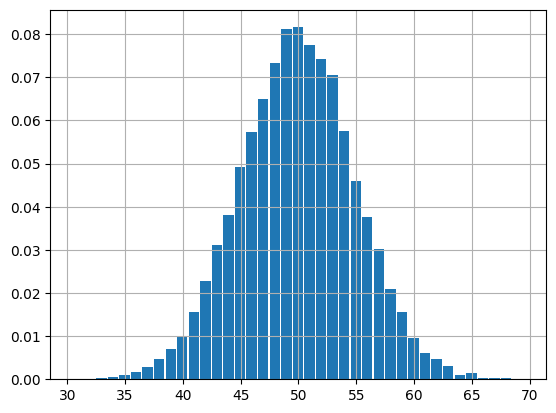

In [15]:
rst_pd= pd.DataFrame({'Repetition': np.arange(1, num_repetitions+ 1),'Number of Heads': heads})
fig = rst_pd['Number of Heads'].hist(bins=np.arange(30.5, 69.6, 1), density = True, width=.9)


In [16]:
tosses = np.arange(1, 51, 1)
results = pd.DataFrame({'Tosses': tosses, 'Chance of at least one H': 1-(1/2)**tosses})
results.head(10)


,Tosses,Chance of at least one H
0,1,0.500000
1,2,0.750000
2,3,0.875000
3,4,0.937500
4,5,0.968750
5,6,0.984375
6,7,0.992188
7,8,0.996094
8,9,0.998047
9,10,0.999023


In [28]:
goats = np.array(['first goat','second goat'])
hidden_behind_door = np.append(goats,"car")

def other_goat(x):
    if x == 'first goat':
        return 'second goat'
    elif x == 'second goat':
        return 'first goat'
    

def monty_hall_game():
    # 나머지 파라미터 없으므로 복원 추출을 한다
    contestant_guess = np.random.choice(hidden_behind_door)
    if contestant_guess== 'first goat':
        return[contestant_guess, 'second goat', 'car']
    if contestant_guess == 'second goat':
        return[contestant_guess, 'first goat', 'car']
    if contestant_guess== 'car':
        revealed= np.random.choice(goats)
        return[contestant_guess, revealed, other_goat(revealed)]
    

# empty collection table
games= pd.DataFrame(columns=['Guess', 'Revealed', 'Remaining'])
# Play the game 10000 times and 
# record the results in the table games
for i in np.arange(10000):
    games.loc[i] = monty_hall_game()

games.head()


,Guess,Revealed,Remaining
0,first goat,second goat,car
1,first goat,second goat,car
2,car,second goat,first goat
3,second goat,first goat,car
4,first goat,second goat,car


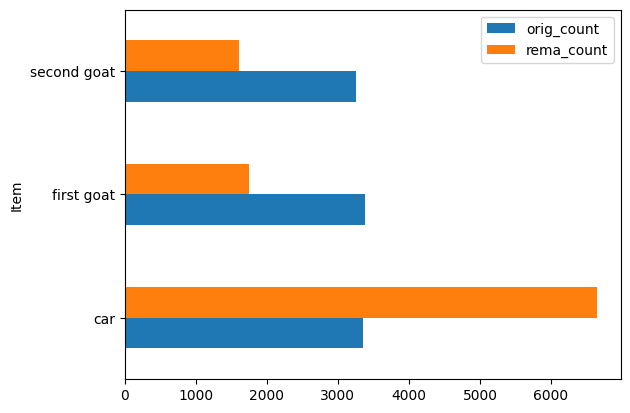

In [29]:
original_choice = games.groupby('Guess')['Guess'].count().reset_index(name='orig_count')
remaining_choice = games.groupby('Remaining')['Remaining'].count().reset_index(name='rema_count')

joined = original_choice.join(remaining_choice.set_index('Remaining'),on='Guess')
joined


fig = joined.set_index('Guess').plot.barh(ylabel= 'Item')
